
¡Hola, Ariel!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>



# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

<div style="color: blue; font-weight: bold;">
Plan:
    
- Explorar los datos crudos.
- Buscar datos ausentes y duplicados; limpiarlos en caso de ser necesario.
- Convertir los tipos de datos para un mejor manejo, en caso de ser necesario.
- Usar filtros, agrupaciones y fusiones de dataframes, según sea conveniente para el análisis.
- Usar gráficos adecuados para la visualización de los datos, según lo que se requiera responder.
- Formular hipótesis adecuadas y usar la o las pruebas de hipótesis pertinentes.
- Responder a la pregunta ¿Cuál es la mejor tarifa? con base en los gráficos y las pruebas de hipótesis.
    
</div>

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats as st
from scipy.stats import norm
import seaborn as sns


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recomiendo cargar la libreria math. De esta manera, puedes realizar redondeos con otros métodos. 
</div>

In [2]:
# Carga los archivos de datos en diferentes DataFrames
megaline_calls_df = pd.read_csv('/datasets/megaline_calls.csv')
megaline_internet_df = pd.read_csv('/datasets/megaline_internet.csv')
megaline_messages_df = pd.read_csv('/datasets/megaline_messages.csv')
megaline_plans_df = pd.read_csv('/datasets/megaline_plans.csv')
megaline_users_df = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

In [3]:
megaline_calls_df #Imprimir el df

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


In [4]:
megaline_internet_df #Imprimir el df

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


In [5]:
megaline_messages_df #Imprimir el df

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


In [6]:
megaline_plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [7]:
megaline_users_df #Imprimir el df

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


## Tarifas

In [8]:
megaline_plans_df.info() #Información general del df de los planes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [9]:
megaline_plans_df #Mostrar en pantalla el df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div style="color: blue;">
Los tipos de datos pacen coungruentes con los encabezados de cada columna. No es necesario hacer conversiones a este df.

Por otro lado, a simple vista se puede comprobar que no hay duplicados ni datos ausentes.

Este df está listo para ser utilizado.
</div>

## Corregir datos

<div style="color: blue;">
No es necesario corregir datos a este df
</div>

## Enriquecer los datos


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

Muy buen trabajo, solamente te sugiero que en este apartado menciones un poco sobre la transformación que se debe realizar de megabytes a gigabytes. 
</div>

<div class="alert alert-block alert-info">
<b>La transformación de megabytes a gigabytes la hice más adelante, en el punto 1.11. Agregar datos por usuario.
Quisiera dejarlo así, pues me consumiría tiempo valioso modificar el código para colocarlo en esta sección, por favor.</b> <a class="tocSkip"></a>

<div style="color: blue;">
No aplica
</div>

## Usuarios/as

In [10]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
megaline_users_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
# Imprime una muestra de datos para usuarios
megaline_users_df.sample(5)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
141,1141,Kirstie,Hodges,46,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,NaN
385,1385,Nohemi,Erickson,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-19,surf,NaN
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07
384,1384,Dominique,Good,36,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-06-09,ultimate,NaN
215,1215,Adelle,Knapp,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-01,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

In [12]:
megaline_users_df['reg_date'] = pd.to_datetime(megaline_users_df['reg_date'], format='%Y-%m-%d')
megaline_users_df['churn_date'] = pd.to_datetime(megaline_users_df['churn_date'], format='%Y-%m-%d')
megaline_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


<div class="alert alert-block alert-warning">
<b>Comentario Revisor</b> <a class="tocSkip"></a>

En todos los casos en los que cambiamos el tipo de variable a datetime, te recomiendo agregar el argumento "format='%Y-%m-%d'" dentro de la función to_datetime(). De esta manera, puedes asegurarte siempre de que el formato de la fecha que deseas cambiar sea el que necesitas.
</div>

<div class="alert alert-block alert-info">
<b>
Gracias por la sugerencia, la tendré en cuenta.

Acabo de implementarla en este proyecto.
</b> <a class="tocSkip"></a>

In [13]:
users_duplicates = megaline_users_df.duplicated().sum() #Revisar si hay filas completas duplicadas
print(f"Duplicated rows in megaline_users_df: {users_duplicates}")

Duplicated rows in megaline_users_df: 0


In [14]:
megaline_users_duplicated_user_id = megaline_users_df['user_id'].duplicated().sum() #Revisar si hay valores duplicados de userID
print(f"Duplicated values of id in megaline_messages_df: {megaline_users_duplicated_user_id}")

Duplicated values of id in megaline_messages_df: 0


In [15]:
churn_date_nulls = megaline_users_df['churn_date'].isna().sum()
print(f"Null values in 'churn_date': {churn_date_nulls}")

Null values in 'churn_date': 466


### Enriquecer los datos

In [16]:
# Crear la columna 'user_status' basada en 'churn_date' (fecha de baja del servicio)
megaline_users_df['user_status'] = np.where(
    megaline_users_df['churn_date'].isna(),
    'Active',
    'Inactive'
)

# Verificar el resultado
print(megaline_users_df['user_status'].value_counts())

Active      466
Inactive     34
Name: user_status, dtype: int64


In [17]:
megaline_users_df #revisar el nuevo aspecto del df

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,user_status
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,Active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,Active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,Active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,Active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,Active
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,Active
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,Active
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,Active
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,Active


<div style="color: blue;">
Dado que el megaline_users_df contiene la información de la muestra de 500 usurios, era totalmente esperado que NO hubiera filas duplicadas.

Para la columna 'churn_date' (fecha de baja del servicio), era esperable encontar datos ausentes, pues esto significa que los usuarios no se han dado de baja del servicio; por lo que decidí crear una nueva columna llamada "user_status", basándome en los valores de 'churn_date'. Puede que sea útil para el análisis.
</div>

## Llamadas

In [18]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
megaline_calls_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [19]:
# Imprime una muestra de datos para las llamadas
megaline_calls_df.sample(5)


,id,user_id,call_date,duration
123383,1435_13,1435,2018-10-02,18.07
19824,1076_146,1076,2018-10-11,6.73
95838,1340_188,1340,2018-09-10,0.41
111100,1390_549,1390,2018-11-04,11.11
117100,1409_88,1409,2018-11-21,2.98


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

In [20]:
megaline_calls_df['call_date'] = pd.to_datetime(megaline_calls_df['call_date'], format='%Y-%m-%d') #Convertir los datos de fechas de tipo object a
#tipo fecha
megaline_calls_df.info() #Revisar que se hizo el cambio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [21]:
megaline_calls_df['duration'] = np.ceil(megaline_calls_df['duration']) #Redondear hacia aariba la duración de las llamadas

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo en redondear la duración de las llamadas.
    
</div>

In [22]:
megaline_calls_df['duration'] = megaline_calls_df['duration'].astype(int) #Ahora que la duración está redondeada a minutos
#enteros, se pueden convertir los datos a tipo entero.

In [23]:
calls_duplicates = megaline_calls_df.duplicated().sum() #Revisar si hay filas enteras duplicadas
print(f"Duplicated rows in megaline_calls_df: {calls_duplicates}")

Duplicated rows in megaline_calls_df: 0


In [24]:
megaline_calls_duplicated_id = megaline_calls_df['id'].duplicated().sum() #Revisar si hay valores duplicados de ID
print(f"Duplicated values of id in megaline_calls_df: {megaline_calls_duplicated_id}")

Duplicated values of id in megaline_calls_df: 0


In [25]:
megaline_calls_duplicated_user_id = megaline_calls_df['user_id'].duplicated().sum() #Revisar si hay valores duplicados de userID
print(f"Duplicated values of user_id in megaline_calls_df: {megaline_calls_duplicated_user_id}")

Duplicated values of user_id in megaline_calls_df: 137254


In [26]:
megaline_calls_df.sample(5) #Imprimir una muestra de los datos


,id,user_id,call_date,duration
120634,1420_204,1420,2018-10-08,0
64958,1236_233,1236,2018-10-24,1
111873,1393_50,1393,2018-11-20,9
91978,1329_1608,1329,2018-11-15,6
7399,1035_253,1035,2018-12-23,8


<div style="color: blue;">
Revisé la información de megaline_calls_df con info(), encontré que los datos en la columna de fecha eran tipo object, por lo que los convertí a tipo fecha con pandas.

Rendondeé la duración al valor superior inmediato y convertí la columa a tipo entero.

Busqué duplicados en el df, primero por filas enteras y luego por implícitos. No encontré filas enteras duplicadas, tampoco hay indicios de duplicados implícitos. Los valores de 'id' son todos únicos, por lo que funcionaría como "clave primaria". En cuanto a los duplicados en 'user_id', no necesariamente son duplicados implícitos, pues un mismo usuario puede hacer llamadas en diferentes ocaciones.

En cuanto a datos nulos, no es necesario buscarlos explícitamente, pues desde .info() se puede observar que todas las columnas tienen datos NO-nulos.
</div>

### Enriquecer los datos

<div style="color: blue;">
No aplica
</div>

## Mensajes

In [27]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
megaline_messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [28]:
# Imprime una muestra de datos para los mensajes
megaline_messages_df.sample(5)

,id,user_id,message_date
75697,1492_43,1492,2018-11-12
59346,1374_520,1374,2018-11-02
8708,1064_112,1064,2018-12-30
17093,1113_185,1113,2018-06-11
18741,1121_68,1121,2018-12-13


### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [29]:
megaline_messages_df['message_date'] = pd.to_datetime(megaline_messages_df['message_date'], format='%Y-%m-%d')
megaline_messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [30]:
messages_duplicates = megaline_messages_df.duplicated().sum() #Revisar si hay filas completas duplicadas
print(f"Duplicated rows in megaline_messages_df: {messages_duplicates}")

Duplicated rows in megaline_messages_df: 0


In [31]:
megaline_messages_duplicated_id = megaline_messages_df['id'].duplicated().sum() #Revisar si hay valores duplicados de ID
print(f"Duplicated values of id in megaline_messages_df: {megaline_messages_duplicated_id}")

Duplicated values of id in megaline_messages_df: 0


In [32]:
megaline_messages_duplicated_user_id = megaline_messages_df['user_id'].duplicated().sum() #Revisar si hay valores duplicados de userID
print(f"Duplicated values of id in megaline_messages_df: {megaline_messages_duplicated_user_id}")

Duplicated values of id in megaline_messages_df: 75649


<div style="color: blue;">
Revisé la información de megaline_messages_df con info(), encontré que los datos en la columna de fecha eran tipo object, por lo que los convertí a tipo fecha con pandas.
    
Busqué duplicados en el df, primero por filas enteras y luego por implícitos. No encontré filas enteras duplicadas, tampoco hay indicios de duplicados implícitos. Los valores de 'id' son todos únicos, por lo que funcionaría como "clave primaria". En cuanto a los duplicados en 'user_id', no necesariamente son duplicados implícitos, pues un mismo usuario puede enviar mensajes en diferentes ocaciones.

En cuanto a datos nulos, no es necesario buscarlos explícitamente, pues desde .info() se puede observar que todas las columnas tienen datos NO-nulos.
</div>

### Enriquecer los datos

<div style="color: blue;">
No aplica
</div>

## Internet

In [33]:
# Imprime la información general/resumida sobre el DataFrame de internet
megaline_internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [34]:
# Imprime una muestra de datos para el tráfico de internet
megaline_internet_df.sample(5)

,id,user_id,session_date,mb_used
103183,1494_65,1494,2018-11-23,0.00
20224,1092_65,1092,2018-12-13,242.08
70923,1331_174,1331,2018-08-30,153.87
17242,1077_362,1077,2018-03-06,1115.80
4929,1028_502,1028,2018-04-09,803.15


### Corregir los datos

In [35]:
megaline_internet_df['session_date'] = pd.to_datetime(megaline_internet_df['session_date'], format='%Y-%m-%d') #Convertir las fechas a formato fecha
megaline_internet_df.info() #Revisar que se aplicó el cambio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [36]:
internet_duplicates = megaline_internet_df.duplicated().sum() #Revisar si hay filas completas duplicadas
print(f"Duplicated rows in megaline_internet_df: {internet_duplicates}")

Duplicated rows in megaline_internet_df: 0


In [37]:
megaline_internet_duplicated_id = megaline_internet_df['id'].duplicated().sum() #Revisar si hay valores duplicados de ID
print(f"Duplicated values of id in megaline_internet_duplicated_id: {megaline_internet_duplicated_id}")

Duplicated values of id in megaline_internet_duplicated_id: 0


In [38]:
megaline_internet_user_id = megaline_internet_df['user_id'].duplicated().sum() #Revisar si hay valores duplicados de userID
print(f"Duplicated values of user_id in megaline_internet_df: {megaline_internet_user_id}")

Duplicated values of user_id in megaline_internet_df: 104336


<div style="color: blue;">
Revisé la información de megaline_internet_df con info(), encontré que los datos en la columna de fecha eran tipo object, por lo que los convertí a tipo fecha con pandas.
    
Busqué duplicados en el df, primero por filas enteras y luego por implícitos. No encontré filas enteras duplicadas, tampoco hay indicios de duplicados implícitos. Los valores de 'id' son todos únicos, por lo que funcionaría como "clave primaria". En cuanto a los duplicados en 'user_id', no necesariamente son duplicados implícitos, pues un mismo usuario puede enviar mensajes en diferentes ocaciones.

En cuanto a datos nulos, no es necesario buscarlos explícitamente, pues desde .info() se puede observar que todas las columnas tienen datos NO-nulos.
</div>

### Enriquecer los datos

<div style="color: blue;">
No aplica
</div>

## Estudiar las condiciones de las tarifas

In [39]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
megaline_plans_df


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [40]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_user_month = megaline_calls_df.groupby([
    'user_id',
    megaline_calls_df['call_date'].dt.month  # Extrae solo el mes
]).agg({
    'id': 'count'
}).reset_index().rename(columns={'id': 'calls_count', 'call_date': 'month'})

calls_user_month.columns = ['user_id','month', 'calls_count']
calls_user_month #Mostrar los datos de llamadas por usuario al mes

,user_id,month,calls_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45



<div class="alert alert-block alert-warning">

<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien es correcta la forma de agrupar para sacar la duración de las llamadas por cada ususario, para proximas ocasiones puedes hacer uso de la siguiente forma:
    
    pivot_calls = calls.pivot_table(index=['user_id', 'month'],
                                values=['duration'],
                                aggfunc=['sum','count']).reset_index()

</div>


<div class="alert alert-block alert-info">
<b>
Gracias por la resomendación.

Esa función "pivot_table" no fue enseñada en la teoría de los sprints anteriores, por lo que sólo ocupé agg().
</b> <a class="tocSkip"></a>

In [41]:
calls_user_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      2258 non-null   int64
 1   month        2258 non-null   int64
 2   calls_count  2258 non-null   int64
dtypes: int64(3)
memory usage: 53.0 KB


In [42]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_user_month = megaline_calls_df.groupby([
    'user_id',
    megaline_calls_df['call_date'].dt.month  # Extrae solo el mes
]).agg({
    'duration': 'sum'
}).reset_index()

minutes_user_month.columns = ['user_id','month', 'minutes_used']
minutes_user_month #Mostrar los datos de minutos por usuario al mes


,user_id,month,minutes_used
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [43]:
minutes_user_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   user_id       2258 non-null   int64
 1   month         2258 non-null   int64
 2   minutes_used  2258 non-null   int64
dtypes: int64(3)
memory usage: 53.0 KB


In [44]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_user_month = megaline_messages_df.groupby([
    'user_id',
    megaline_messages_df['message_date'].dt.month  # Extrae solo el mes
]).agg({
    'id': 'count'
}).reset_index()

messages_user_month.columns = ['user_id','month', 'messages_count']
messages_user_month #Mostrar los datos de mensajes por usuario al mes

,user_id,month,messages_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [45]:
messages_user_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1806 entries, 0 to 1805
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         1806 non-null   int64
 1   month           1806 non-null   int64
 2   messages_count  1806 non-null   int64
dtypes: int64(3)
memory usage: 42.5 KB


In [46]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_usage_user_month = megaline_internet_df.groupby([
    'user_id',
    megaline_internet_df['session_date'].dt.month  # Extrae solo el mes
]).agg({
    'mb_used': 'sum'
}).reset_index()
internet_usage_user_month.columns = ['user_id','month', 'mb_used']

In [47]:
internet_usage_user_month['gb_used'] = np.ceil(internet_usage_user_month['mb_used'] / 1024).astype(int)

In [48]:
internet_usage_user_month #Mostrar los datos de volumen de tráfico de internet por usuario al mes

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


In [49]:
internet_usage_user_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  2277 non-null   int64  
 1   month    2277 non-null   int64  
 2   mb_used  2277 non-null   float64
 3   gb_used  2277 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 71.3 KB


In [50]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
user_month_usage = calls_user_month.merge(minutes_user_month, on=['user_id', 'month'], how='outer')
user_month_usage = user_month_usage.merge(messages_user_month, on=['user_id', 'month'], how='outer')
user_month_usage = user_month_usage.merge(internet_usage_user_month, on=['user_id', 'month'], how='outer')
user_month_usage


,user_id,month,calls_count,minutes_used,messages_count,mb_used,gb_used
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,NaN,NaN,61.0,13039.91,13.0
2289,1361,5,NaN,NaN,2.0,1519.69,2.0
2290,1482,10,NaN,NaN,2.0,NaN,NaN
2291,1108,12,NaN,NaN,NaN,233.17,1.0


In [51]:
user_month_usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2293 non-null   int64  
 1   month           2293 non-null   int64  
 2   calls_count     2258 non-null   float64
 3   minutes_used    2258 non-null   float64
 4   messages_count  1806 non-null   float64
 5   mb_used         2277 non-null   float64
 6   gb_used         2277 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 143.3 KB


In [52]:
# Rellenar nulos con 0 en todas las columnas de consumo
user_month_usage = user_month_usage.fillna({
    'calls_count': 0,
    'minutes_used': 0,
    'messages_count': 0,
    'mb_used': 0,
    'gb_used': 0
})

# Convertir columnas numéricas a enteros donde corresponde
user_month_usage = user_month_usage.astype({
    'calls_count': int,
    'minutes_used': int,
    'messages_count': int,
    'mb_used': int,
    'gb_used': int
})


In [53]:
user_month_usage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         2293 non-null   int64
 1   month           2293 non-null   int64
 2   calls_count     2293 non-null   int64
 3   minutes_used    2293 non-null   int64
 4   messages_count  2293 non-null   int64
 5   mb_used         2293 non-null   int64
 6   gb_used         2293 non-null   int64
dtypes: int64(7)
memory usage: 143.3 KB


In [54]:
user_month_usage

,user_id,month,calls_count,minutes_used,messages_count,mb_used,gb_used
0,1000,12,16,124,11,1901,2
1,1001,8,27,182,30,6919,7
2,1001,9,49,315,44,13314,14
3,1001,10,65,393,53,22330,22
4,1001,11,64,426,36,18504,19
...,...,...,...,...,...,...,...
2288,1349,12,0,0,61,13039,13
2289,1361,5,0,0,2,1519,2
2290,1482,10,0,0,2,0,0
2291,1108,12,0,0,0,233,1


In [55]:
plan_per_user = megaline_users_df[['user_id', 'plan']]
plan_per_user

,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf
...,...,...
495,1495,surf
496,1496,surf
497,1497,ultimate
498,1498,surf


In [56]:
# Añade la información de la tarifa

#Identificar el plan de cada usuario
user_month_usage = user_month_usage.merge(plan_per_user, on='user_id', how='left')
user_month_usage

,user_id,month,calls_count,minutes_used,messages_count,mb_used,gb_used,plan
0,1000,12,16,124,11,1901,2,ultimate
1,1001,8,27,182,30,6919,7,surf
2,1001,9,49,315,44,13314,14,surf
3,1001,10,65,393,53,22330,22,surf
4,1001,11,64,426,36,18504,19,surf
...,...,...,...,...,...,...,...,...
2288,1349,12,0,0,61,13039,13,surf
2289,1361,5,0,0,2,1519,2,surf
2290,1482,10,0,0,2,0,0,ultimate
2291,1108,12,0,0,0,233,1,ultimate


In [57]:
#Asegurar el correcto nombre de las columnas
user_month_usage.columns = ['user_id','month','calls_count','minutes_used','messages_count', 'mb_used','gb_used','plan_name']
user_month_usage

,user_id,month,calls_count,minutes_used,messages_count,mb_used,gb_used,plan_name
0,1000,12,16,124,11,1901,2,ultimate
1,1001,8,27,182,30,6919,7,surf
2,1001,9,49,315,44,13314,14,surf
3,1001,10,65,393,53,22330,22,surf
4,1001,11,64,426,36,18504,19,surf
...,...,...,...,...,...,...,...,...
2288,1349,12,0,0,61,13039,13,surf
2289,1361,5,0,0,2,1519,2,surf
2290,1482,10,0,0,2,0,0,ultimate
2291,1108,12,0,0,0,233,1,ultimate


In [58]:
user_month_usage.columns #Revisar que no haya columas repetidas, derivadas de las fusiones que se ha hecho

Index(['user_id', 'month', 'calls_count', 'minutes_used', 'messages_count',
       'mb_used', 'gb_used', 'plan_name'],
      dtype='object')

In [59]:
user_month_usage = user_month_usage.merge(megaline_plans_df, on='plan_name', how='left')
user_month_usage

,user_id,month,calls_count,minutes_used,messages_count,mb_used,gb_used,plan_name,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16,124,11,1901,2,ultimate,1000,30720,3000,70,7,0.01,0.01
1,1001,8,27,182,30,6919,7,surf,50,15360,500,20,10,0.03,0.03
2,1001,9,49,315,44,13314,14,surf,50,15360,500,20,10,0.03,0.03
3,1001,10,65,393,53,22330,22,surf,50,15360,500,20,10,0.03,0.03
4,1001,11,64,426,36,18504,19,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0,0,61,13039,13,surf,50,15360,500,20,10,0.03,0.03
2289,1361,5,0,0,2,1519,2,surf,50,15360,500,20,10,0.03,0.03
2290,1482,10,0,0,2,0,0,ultimate,1000,30720,3000,70,7,0.01,0.01
2291,1108,12,0,0,0,233,1,ultimate,1000,30720,3000,70,7,0.01,0.01


In [60]:
user_month_usage.columns

Index(['user_id', 'month', 'calls_count', 'minutes_used', 'messages_count',
       'mb_used', 'gb_used', 'plan_name', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute'],
      dtype='object')

In [61]:
user_month_usage = user_month_usage.drop(columns='mb_used') #Quitar la columna de megabytes usados

In [62]:
user_month_usage['mb_per_month_included'] = (user_month_usage['mb_per_month_included'] / 1024).astype(int) #convcertir los megas
#incluidos en el paquete a gigas
user_month_usage['mb_per_month_included'].head()

0    30
1    15
2    15
3    15
4    15
Name: mb_per_month_included, dtype: int64

In [63]:
user_month_usage = user_month_usage.rename(columns={'mb_per_month_included': 'gb_per_month_included'}) #Renombrar la columna
#de megas incluidos a gigas incluidos
user_month_usage.columns

Index(['user_id', 'month', 'calls_count', 'minutes_used', 'messages_count',
       'gb_used', 'plan_name', 'messages_included', 'gb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute'],
      dtype='object')

In [64]:
user_month_usage

,user_id,month,calls_count,minutes_used,messages_count,gb_used,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16,124,11,2,ultimate,1000,30,3000,70,7,0.01,0.01
1,1001,8,27,182,30,7,surf,50,15,500,20,10,0.03,0.03
2,1001,9,49,315,44,14,surf,50,15,500,20,10,0.03,0.03
3,1001,10,65,393,53,22,surf,50,15,500,20,10,0.03,0.03
4,1001,11,64,426,36,19,surf,50,15,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0,0,61,13,surf,50,15,500,20,10,0.03,0.03
2289,1361,5,0,0,2,2,surf,50,15,500,20,10,0.03,0.03
2290,1482,10,0,0,2,0,ultimate,1000,30,3000,70,7,0.01,0.01
2291,1108,12,0,0,0,1,ultimate,1000,30,3000,70,7,0.01,0.01


In [65]:
# Calcula el ingreso mensual para cada usuario

# Crear un nuevo DataFrame para los ingresos
month_user_income_calculation_df = user_month_usage.copy()
month_user_income_calculation_df

,user_id,month,calls_count,minutes_used,messages_count,gb_used,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16,124,11,2,ultimate,1000,30,3000,70,7,0.01,0.01
1,1001,8,27,182,30,7,surf,50,15,500,20,10,0.03,0.03
2,1001,9,49,315,44,14,surf,50,15,500,20,10,0.03,0.03
3,1001,10,65,393,53,22,surf,50,15,500,20,10,0.03,0.03
4,1001,11,64,426,36,19,surf,50,15,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0,0,61,13,surf,50,15,500,20,10,0.03,0.03
2289,1361,5,0,0,2,2,surf,50,15,500,20,10,0.03,0.03
2290,1482,10,0,0,2,0,ultimate,1000,30,3000,70,7,0.01,0.01
2291,1108,12,0,0,0,1,ultimate,1000,30,3000,70,7,0.01,0.01


In [66]:
month_user_income_calculation_df.columns

Index(['user_id', 'month', 'calls_count', 'minutes_used', 'messages_count',
       'gb_used', 'plan_name', 'messages_included', 'gb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute'],
      dtype='object')

In [67]:
#Crear una columna que contenga el exceso de minutos usados por usuario al mer
#Cualquier resultado negativo se sustituye por un cero con .clip(lower=0)
month_user_income_calculation_df['excess_minutes'] = (month_user_income_calculation_df['minutes_used'] - 
                                                      month_user_income_calculation_df['minutes_included']).clip(lower=0)

In [68]:
#Calcular el excedente de mensajes por usuario al mes
#Cualquier resultado negativo se sustituye por un cero con .clip(lower=0)
month_user_income_calculation_df['excess_messages'] = (month_user_income_calculation_df['messages_count'] - 
                                                      month_user_income_calculation_df['messages_included']).clip(lower=0)

In [69]:
#Calcular el excedente de gigabytes usados por usuario al mes
#Cualquier resultado negativo se sustituye por un cero con .clip(lower=0)
month_user_income_calculation_df['excess_gb'] = (month_user_income_calculation_df['gb_used'] - 
                                                      month_user_income_calculation_df['gb_per_month_included']).clip(lower=0)

In [70]:
#Imprimir una muestra de las 3 columnas creadas
month_user_income_calculation_df[['excess_minutes','excess_messages','excess_gb']].sample(20)

,excess_minutes,excess_messages,excess_gb
1570,0,0,0
15,0,0,0
1542,0,36,0
967,5,0,1
1420,0,11,9
743,0,0,0
1552,0,0,0
165,0,0,0
139,0,0,0
228,0,0,5


In [71]:
#Calcular el monto pagado por cada usuario al mes, debido al exceso de minutos
month_user_income_calculation_df['excess_minutes_cost'] = (
    month_user_income_calculation_df['excess_minutes']
    * month_user_income_calculation_df['usd_per_minute']
)

In [72]:
#Calcular el monto pagado por cada usuario al mes, debido al exceso de mensajes
month_user_income_calculation_df['excess_mesaages_cost'] = (
    month_user_income_calculation_df['excess_messages']
    * month_user_income_calculation_df['usd_per_message']
)

In [73]:
#Calcular el monto pagado por cada usuario al mes, debido al exceso de gigabytes
month_user_income_calculation_df['excess_gb_cost'] = (
    month_user_income_calculation_df['excess_gb']
    * month_user_income_calculation_df['usd_per_gb']
)

In [74]:
#Imprimir una muestra de las 3 columnas creadas
month_user_income_calculation_df[['excess_minutes_cost','excess_mesaages_cost','excess_gb_cost']].sample(20)

,excess_minutes_cost,excess_mesaages_cost,excess_gb_cost
1032,3.54,0.00,30
164,0.00,0.00,0
865,0.00,0.00,0
1651,4.77,0.57,0
501,0.00,0.00,0
574,0.00,0.00,60
1281,0.00,0.00,0
2123,0.00,0.00,0
29,1.02,0.00,50
107,4.14,0.00,0


In [75]:
#Calcular el ingreso total por usuario al mes
month_user_income_calculation_df['month_total_income'] = (
    month_user_income_calculation_df['usd_monthly_pay'] +
    month_user_income_calculation_df['excess_minutes_cost'] +
    month_user_income_calculation_df['excess_mesaages_cost'] +
    month_user_income_calculation_df['excess_gb_cost']
)

In [76]:
#Imprimir una muestra de la nueva columna creada
month_user_income_calculation_df[['user_id','month_total_income']].sample(20)

,user_id,month_total_income
1880,1408,20.66
1445,1321,100.00
962,1206,140.00
1216,1261,53.24
2125,1468,60.00
325,1071,20.00
572,1123,50.00
2,1001,20.00
581,1126,70.00
309,1067,80.00


In [77]:
#Información genera del df usado para calsular el ingreso total por usuario al mes
month_user_income_calculation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int64  
 2   calls_count            2293 non-null   int64  
 3   minutes_used           2293 non-null   int64  
 4   messages_count         2293 non-null   int64  
 5   gb_used                2293 non-null   int64  
 6   plan_name              2293 non-null   object 
 7   messages_included      2293 non-null   int64  
 8   gb_per_month_included  2293 non-null   int64  
 9   minutes_included       2293 non-null   int64  
 10  usd_monthly_pay        2293 non-null   int64  
 11  usd_per_gb             2293 non-null   int64  
 12  usd_per_message        2293 non-null   float64
 13  usd_per_minute         2293 non-null   float64
 14  excess_minutes         2293 non-null   int64  
 15  exce

In [78]:
#Guardar la información del ingreso por usuario en un nuevo df, para un mejor manejo de estos datos
total_month_income_user = month_user_income_calculation_df[['user_id','month_total_income','plan_name']]
total_month_income_user.sample(20)

,user_id,month_total_income,plan_name
1974,1433,70.00,ultimate
489,1105,32.75,surf
971,1209,26.99,surf
2193,1488,143.78,surf
976,1210,20.00,surf
404,1085,70.00,ultimate
692,1150,70.00,ultimate
1401,1312,121.02,surf
35,1009,126.42,surf
824,1175,43.27,surf


In [79]:
total_month_income_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             2293 non-null   int64  
 1   month_total_income  2293 non-null   float64
 2   plan_name           2293 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 71.7+ KB


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>


Recuerda que para este punto, es necesario que ya tengamos los valores redondeados de la duración de las llamadas y redondear la transformación de megabytes a gigabytes. Esto cobra importancia dado que estamos calculando por cuanto se paso cada usuario, entonces el no redondear puede alterar este valor.
</div>

<div class="alert alert-block alert-info">
<b>La transformación de megabytes a gigabytes ya fue hecha, en el punto 1.11. Agregar datos por usuario.
El dataframe user_month_usage ya tiene todos los datos limpios, con el tipo de dato adecuado, datos redondeados y gigabytes en vez de megabytes. Ver las columnas 'minutes_used', 'gb_used' y 'gb_per_month_included'.</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!

In [113]:
 user_month_usage.columns

Index(['user_id', 'month', 'calls_count', 'minutes_used', 'messages_count',
       'gb_used', 'plan_name', 'messages_included', 'gb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute'],
      dtype='object')

In [114]:
user_month_usage.head()

,user_id,month,calls_count,minutes_used,messages_count,gb_used,plan_name,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16,124,11,2,ultimate,1000,30,3000,70,7,0.01,0.01
1,1001,8,27,182,30,7,surf,50,15,500,20,10,0.03,0.03
2,1001,9,49,315,44,14,surf,50,15,500,20,10,0.03,0.03
3,1001,10,65,393,53,22,surf,50,15,500,20,10,0.03,0.03
4,1001,11,64,426,36,19,surf,50,15,500,20,10,0.03,0.03


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [80]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Crear un df para agrupar los datos de month_user_income_calculation_df por plan y mes
mean_call_duration = month_user_income_calculation_df.groupby(['month', 'plan_name']).agg(
    {'minutes_used': 'mean'}
).reset_index().rename(columns={'minutes_used': 'call_duration_mean'})
mean_call_duration['call_duration_mean'] = np.ceil(mean_call_duration['call_duration_mean']).astype(int) #redondear hacia arriba y convertir a entero
mean_call_duration

,month,plan_name,call_duration_mean
0,1,surf,203
1,1,ultimate,194
2,2,surf,297
3,2,ultimate,404
4,3,surf,330
5,3,ultimate,305
6,4,surf,352
7,4,ultimate,337
8,5,surf,400
9,5,ultimate,407


In [81]:
#Filtrar por el plna "surf"
mean_call_duration_surf = mean_call_duration[mean_call_duration['plan_name'] == 'surf'].reset_index()
mean_call_duration_surf

,index,month,plan_name,call_duration_mean
0,0,1,surf,203
1,2,2,surf,297
2,4,3,surf,330
3,6,4,surf,352
4,8,5,surf,400
5,10,6,surf,432
6,12,7,surf,450
7,14,8,surf,411
8,16,9,surf,415
9,18,10,surf,430


In [82]:
#Filtrar por el plan "ultimate"
mean_call_duration_ultimate = mean_call_duration[mean_call_duration['plan_name'] == 'ultimate'].reset_index()
mean_call_duration_ultimate

,index,month,plan_name,call_duration_mean
0,1,1,ultimate,194
1,3,2,ultimate,404
2,5,3,ultimate,305
3,7,4,ultimate,337
4,9,5,ultimate,407
5,11,6,ultimate,371
6,13,7,ultimate,428
7,15,8,ultimate,422
8,17,9,ultimate,438
9,19,10,ultimate,451


In [83]:
#Quitar las columnas que no usarán y renombrar las columnas qué se usarán
mean_call_duration_surf = mean_call_duration_surf.rename(columns={'call_duration_mean': 'surf'}).drop(columns=['index', 'plan_name'])
mean_call_duration_surf

,month,surf
0,1,203
1,2,297
2,3,330
3,4,352
4,5,400
5,6,432
6,7,450
7,8,411
8,9,415
9,10,430


In [84]:
#Quitar las columnas que no usarán y renombrar las columnas qué se usarán
mean_call_duration_ultimate = mean_call_duration_ultimate.rename(columns={'call_duration_mean': 'ultimate'}).drop(columns=['index', 'plan_name'])
mean_call_duration_ultimate

,month,ultimate
0,1,194
1,2,404
2,3,305
3,4,337
4,5,407
5,6,371
6,7,428
7,8,422
8,9,438
9,10,451


In [85]:
# Fusionar los dos DataFrames en uno solo
mean_call_duration_combined = mean_call_duration_surf.merge(
    mean_call_duration_ultimate,
    on='month',
    how='outer'
)
mean_call_duration_combined

,month,surf,ultimate
0,1,203,194
1,2,297,404
2,3,330,305
3,4,352,337
4,5,400,407
5,6,432,371
6,7,450,428
7,8,411,422
8,9,415,438
9,10,430,451


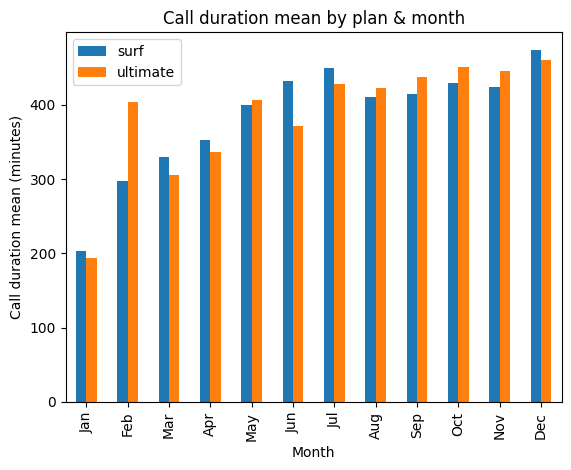

In [86]:
# Diccionario para nombres de meses
month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

#Trazar la gráfica
mean_call_duration_combined[['surf', 'ultimate']].plot(kind='bar')
plt.xticks(range(len(mean_call_duration_combined)), [month_names[m] for m in mean_call_duration_combined['month']])
plt.xlabel('Month')
plt.ylabel('Call duration mean (minutes)')
plt.title('Call duration mean by plan & month')
plt.legend(['surf', 'ultimate'])
plt.show()

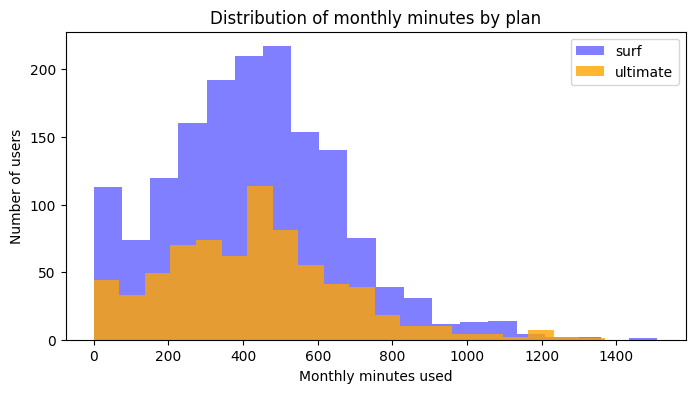

In [87]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Filtrar datos por plan
minutes_surf = month_user_income_calculation_df[month_user_income_calculation_df['plan_name'] == 'surf']['minutes_used']
minutes_ultimate = month_user_income_calculation_df[month_user_income_calculation_df['plan_name'] == 'ultimate']['minutes_used']

# Trazar histogramas
plt.figure(figsize=(8, 4))
plt.hist(minutes_surf, alpha=0.5, label='surf', color='blue', bins=20)
plt.hist(minutes_ultimate, alpha=0.8, label='ultimate', color='orange', bins=20)
plt.xlabel('Monthly minutes used')
plt.ylabel('Number of users')
plt.title('Distribution of monthly minutes by plan')
plt.legend()
plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [88]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_minutes = month_user_income_calculation_df['minutes_used'].mean()
variance_minutes = month_user_income_calculation_df['minutes_used'].var()

# Imprimir resultados
print(f"Average monthly call duration: {mean_minutes:.2f} minutos")
print(f"Variance of monthly call duration: {variance_minutes:.2f} minutos²")


Average monthly call duration: 429.28 minutos
Variance of monthly call duration: 55847.18 minutos²


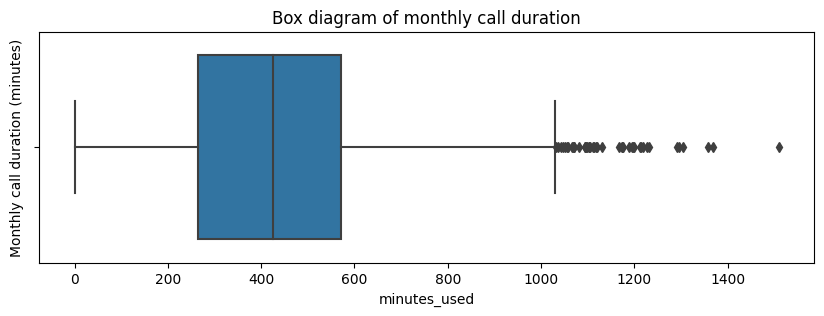

In [89]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(10, 3))
sns.boxplot(x=month_user_income_calculation_df['minutes_used'])
plt.ylabel('Monthly call duration (minutes)')
plt.title('Box diagram of monthly call duration')
plt.show()


### Comportamiento de los usuarios con respecto a las llamadas:

<span style='color:blue'>De la gráfica de barras:</span>
- <span style='color:blue'>Se observa que los usuarios de ambos planes siguen un patrón similar, es decir, en ambos planes las llamadas de los usuarios duraron más en promedio en el segundo semestre del años (julio a diciembre) que en el primer semestre (enero a junio). La mayor duración en el segundo semestre podría estar relacionada con factores estacionales, pero se requiere análisis adicional para confirmarlo.</span>
- <span style='color:blue'>En cuanto al comportamiento por mes, no se ve un domino claro por parte de ninguno de los dos planes, pues hay meses en que la duración promedio del plan "surf" duró más que la del plan "ultimate", pero hay otros meses en los que ocurre lo contrario ("ultimate" > "surf").</span>

<span style='color:blue'>Del histograma:</span>
- <span style='color:blue'>Se observa cláramente que hay un número mucho mayor de usuarios con plan "surf", que con plan "ultimate".</span>
- <span style='color:blue'>En cuanto a los minutos mensuales usados por plan, la mayoría de los usuarios se concentran al rededor de 500 minutos usados, en ambos planes.</span>
- <span style='color:blue'>El valor máximo de minutos usados corresponde al plan "surf" con más de 1500 minutos.</span>
- <span style='color:blue'>El valor máximo de minutos usados con plan "ultimate", por su parte, es cercano a los 1400 minutos.</span>

<span style='color:blue'>Del diagrama de caja:</span>
- <span style='color:blue'>Se observa que la mediana de los minutos mensuales usados se encuentra en un valor cercano a 400.</span>
- <span style='color:blue'>El 50% de los datos se distribuye entre los 250 y los 600 minutos de uso.</span>
- <span style='color:blue'>La mediana cercana a 400 minutos y la distribución entre 250 y 600 minutos sugieren una distribución algo sesgada hacia el uso moderado.</span>
- <span style='color:blue'>El cuartil superior (bigote de la derecha), va desde aproximadamente 600 hasta más de 1000 minutos usados; lo que sugiere la existencia de un subgrupo de usuarios de alto consumo.</span>
- <span style='color:blue'>Se observan varios datos atípicos que van desde ligeramente superior al valor máximo del bigote superior hasta un dato con un valor de más de 1500 minutos usados; lo que indica la eistencia de un puñado de usuarios que hacen uso intensivo de los minutos para llamadas.</span>

### Mensajes

In [90]:
# Compara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Filtrar datos por plan
messages_surf = month_user_income_calculation_df[month_user_income_calculation_df['plan_name'] == 'surf']['messages_count']
messages_ultimate = month_user_income_calculation_df[month_user_income_calculation_df['plan_name'] == 'ultimate']['messages_count']


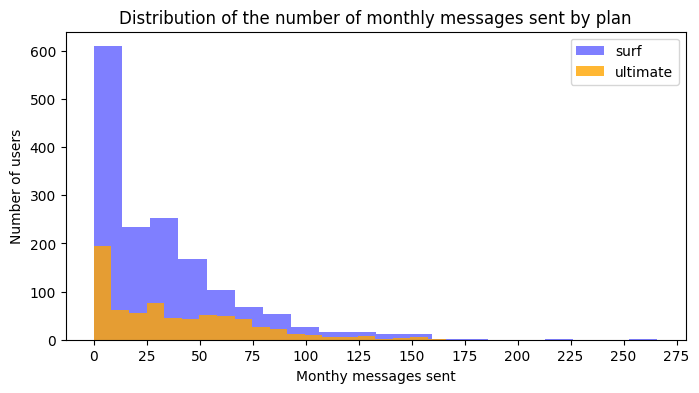

In [91]:
# Trazar histogramas
plt.figure(figsize=(8, 4))
plt.hist(messages_surf, alpha=0.5, label='surf', color='blue', bins=20)
plt.hist(messages_ultimate, alpha=0.8, label='ultimate', color='orange', bins=20)
plt.xlabel('Monthy messages sent')
plt.ylabel('Number of users')
plt.title('Distribution of the number of monthly messages sent by plan')
plt.legend()

max_messages = max(messages_surf.max(), messages_ultimate.max())
xticks = range(0, int(max_messages) + 25, 25)
plt.xticks(xticks)

plt.show()

In [92]:
megaline_plans_df[['plan_name','messages_included']] #Imprimir los mensajes incluidos por tipo de plan

,plan_name,messages_included
0,surf,50
1,ultimate,1000


<div style="color: blue;">
- La distribución de los mensajes enviados por usuario al mes, es muy similar entre ambos planes, de hecho, la única diferencia notable es que hay más usuarios con el plan "surf" que con el plan "uiltimate"; lo cual es esperable debido a que "surf" es más económico. No obsante, se alcanza a ver que las cantidades más grandes (más de 200), corresponden al plan "ultimate", aunque sólo cantidad minúscula de usarios envió tal cantidad de mensajes.

- Al parecer, la mayoría de los usiarios hace poco o nulo uso de los mensajes, dado que estós se concentran en el intervalo de 0 a 25 mensajes enviados al mes.

- Se observa otro subgrupo que hace un uso moderado del servicio de mensajes, que se ubica entre los 25 y 75 mensajes enviados al mes.

- Una cantidad pequeña de usuarios hace un uso relativamente intenso de los mensajes, con más de 75 enviados al mes.
</div>

### Internet

In [93]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Filtrar datos por plan
internet_surf = month_user_income_calculation_df[month_user_income_calculation_df['plan_name'] == 'surf']['gb_used']
internet_ultimate = month_user_income_calculation_df[month_user_income_calculation_df['plan_name'] == 'ultimate']['gb_used']

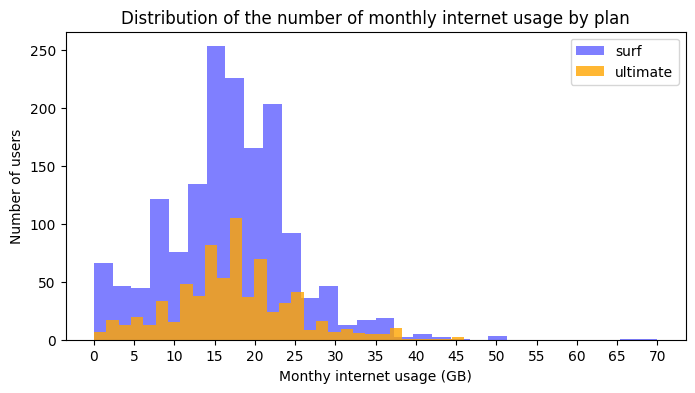

In [94]:
# Trazar histogramas
plt.figure(figsize=(8, 4))
plt.hist(internet_surf, alpha=0.5, label='surf', color='blue', bins=30)
plt.hist(internet_ultimate, alpha=0.8, label='ultimate', color='orange', bins=30)
plt.xlabel('Monthy internet usage (GB)')
plt.ylabel('Number of users')
plt.title('Distribution of the number of monthly internet usage by plan')
plt.legend()

max_gb = max(internet_surf.max(), internet_ultimate.max())
xticks = range(0, int(max_gb) + 5, 5)
plt.xticks(xticks)

plt.show()

In [95]:
month_user_income_calculation_df[['plan_name','gb_per_month_included']].head(2) #Imprimir los mensajes incluidos por tipo de plan

,plan_name,gb_per_month_included
0,ultimate,30
1,surf,15


<div style="color: blue;">
- Nuevamente, la distribución del uso de internet es similar entre ambos planes, siendo notable que más usuarios tienen el plan "surf" que el plan "ultimate".

- La mayoría de usuarios se concentra en un uso mensual de entre 10GB y 25GB. Para los usurios con plan "surf", este uso es intensivo, pues llegan a ocupar más gigabytes de lo que el plan les incluye (15GB). Para los usuarios con plan "ultimate", este uso cae dentro de sus GB incluidos (30GB), por lo que sería un uso moderado.

- Se observa un subgrupo, de ambos planes, que hace un uso bajo del internet, con 10 o menos GB; cubierto perfectamente por ambos planes.

- Un tercer subgrupo, aunque más pequeño, hace un uso intensivo del intenert, consumiendo 25 o más GB al mes. Para el caso de ambos planes, implica que estos usuarios consumen más o mucho más GB de lo que sus planes les incluyen.
</div>

## Ingreso

In [96]:
total_month_income_user.columns

Index(['user_id', 'month_total_income', 'plan_name'], dtype='object')

In [97]:
# Filtrar datos por plan
total_month_income_surf = total_month_income_user[total_month_income_user['plan_name'] == 'surf']['month_total_income']
total_month_income_ultimate = total_month_income_user[total_month_income_user['plan_name'] == 'ultimate']['month_total_income']

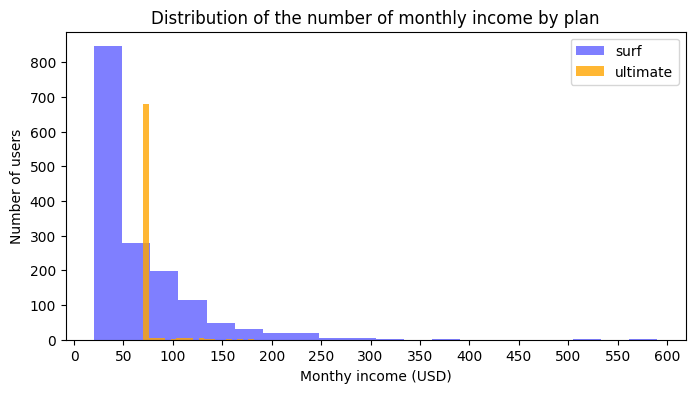

In [98]:
# Trazar histogramas
plt.figure(figsize=(8, 4))
plt.hist(total_month_income_surf, alpha=0.5, label='surf', color='blue', bins=20)
plt.hist(total_month_income_ultimate, alpha=0.8, label='ultimate', color='orange', bins=20)
plt.xlabel('Monthy income (USD)')
plt.ylabel('Number of users')
plt.title('Distribution of the number of monthly income by plan')
plt.legend()

max_income = max(total_month_income_surf.max(), total_month_income_ultimate.max())
xticks = range(0, int(max_income) + 50, 50)
plt.xticks(xticks)

plt.show()

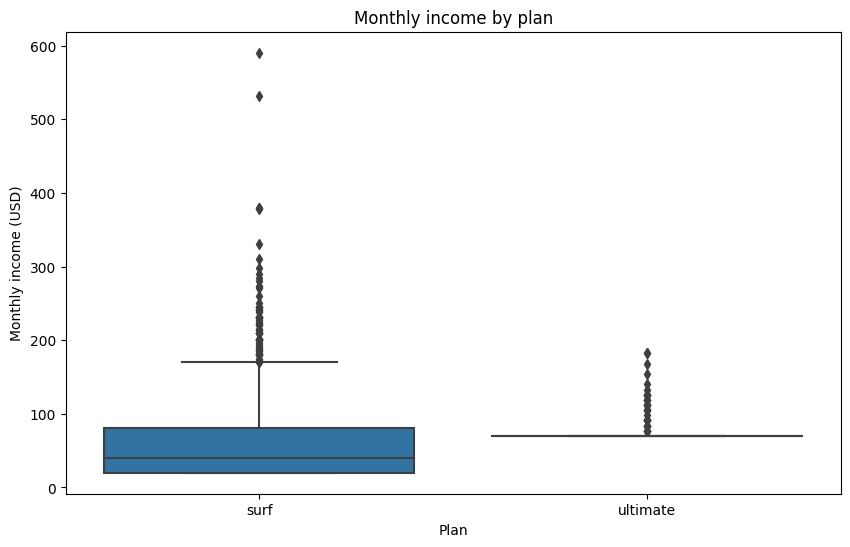

In [99]:
# Combinar datos en un DataFrame con etiquetas de plan
monthly_income_combined = pd.DataFrame({
    'income': pd.concat([total_month_income_surf, total_month_income_ultimate]), #Se concatenan los vectores total_month_income_surf y 
    #total_month_income_ultimate, quedando arriba todos los "surf" y abajo todos los "últimate"
    'plan': ['surf'] * len(total_month_income_surf) + ['ultimate'] * len(total_month_income_ultimate) # Cada ingreso se etiqueta con "surf" o "ultimate"
    #según el la longitud cada uno de los dos vectores (total_month_income_surf y total_month_income_ultimate)
})

# Trazar un solo diagrama de caja con ambos planes
plt.figure(figsize=(10, 6))
sns.boxplot(x='plan', y='income', data=monthly_income_combined)
plt.xlabel('Plan')
plt.ylabel('Monthly income (USD)')
plt.title('Monthly income by plan')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

 Muy buena prática la de usar distintos tipos de gráficas identificar algunos hallazgos y llegar a conclusiones
</div>

## Prueba las hipótesis estadísticas

In [100]:
# Juntar las series de los ingresos en un solo DataFrame
combined_income_df = pd.DataFrame({
    'surf_income': total_month_income_surf,
    'ultimate_income': total_month_income_ultimate
})

combined_income_df.describe() #Revisar los datos estadísticos de ambos planes

,surf_income,ultimate_income
count,1573.000000,720.000000
mean,60.706408,72.313889
std,55.388042,11.395108
min,20.000000,70.000000
25%,20.000000,70.000000
50%,40.360000,70.000000
75%,80.360000,70.000000
max,590.370000,182.000000


In [101]:
# Calcular media y desviación estándar de los ingresos de ambos planes
mu_surf, sigma_surf = total_month_income_surf.mean(), total_month_income_surf.std()
mu_ultimate, sigma_ultimate = total_month_income_ultimate.mean(), total_month_income_ultimate.std()

In [102]:
# Crear un rango de valores para la curva de Gauss
x_surf = np.linspace(max(0, mu_surf - 3*sigma_surf), mu_surf + 4*sigma_surf, 20)  # Rango desde 0 o -3σ
x_ultimate = np.linspace(mu_ultimate - 4*sigma_ultimate, mu_ultimate + 4*sigma_ultimate, 20)

# Calcular la densidad de la distribución normal
y_surf = norm.pdf(x_surf, mu_surf, sigma_surf)
y_ultimate = norm.pdf(x_ultimate, mu_ultimate, sigma_ultimate)

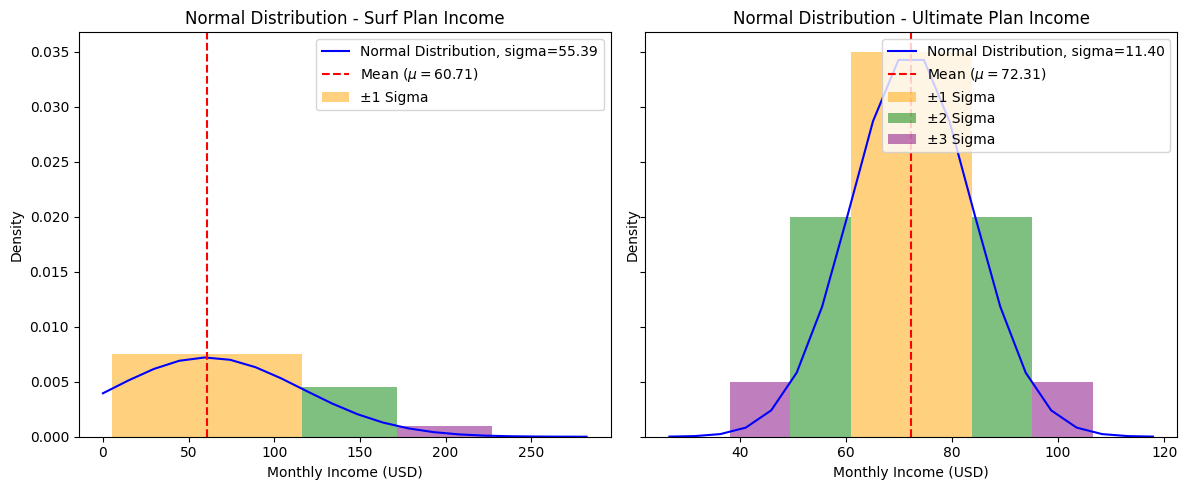

In [103]:
# Crear una figura con dos subgráficas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Gráfica para total_month_income_surf
ax1.plot(x_surf, y_surf, 'b-', label=f'Normal Distribution, sigma={sigma_surf:.2f}')
# Agregar barras continuas con ancho de 1 sigma

ax1.bar(mu_surf - sigma_surf/2, 0.0075, width=sigma_surf, color='orange', alpha=0.5, label='±1 Sigma')
#ax1.bar(mu_surf - 1.5*sigma_surf, 0.0045, width=sigma_surf, color='green', alpha=0.5, label='±2 Sigma')
#ax1.bar(mu_surf - 2.5*sigma_surf, 0.001, width=sigma_surf, color='purple', alpha=0.5, label='±3 Sigma')
ax1.bar(mu_surf + sigma_surf/2, 0.0075, width=sigma_surf, color='orange', alpha=0.5)
ax1.bar(mu_surf + 1.5*sigma_surf, 0.0045, width=sigma_surf, color='green', alpha=0.5)
ax1.bar(mu_surf + 2.5*sigma_surf, 0.001, width=sigma_surf, color='purple', alpha=0.5)

ax1.axvline(mu_surf, color='red', linestyle='--', label=f'Mean ($\mu={mu_surf:.2f}$)') # Agregamos una línea vertical roja en la media

ax1.set_title('Normal Distribution - Surf Plan Income')
ax1.set_xlabel('Monthly Income (USD)')
ax1.set_ylabel('Density')
ax1.legend()

# Gráfica para total_month_income_ultimate
ax2.plot(x_ultimate, y_ultimate, 'b-', label=f'Normal Distribution, sigma={sigma_ultimate:.2f}')

# Agregar barras continuas con ancho de 1 sigma
ax2.bar(mu_ultimate - sigma_ultimate/2, 0.035, width=sigma_ultimate, color='orange', alpha=0.5, label='±1 Sigma')
ax2.bar(mu_ultimate - 1.5*sigma_ultimate, 0.02, width=sigma_ultimate, color='green', alpha=0.5, label='±2 Sigma')
ax2.bar(mu_ultimate - 2.5*sigma_ultimate, 0.005, width=sigma_ultimate, color='purple', alpha=0.5, label='±3 Sigma')
ax2.bar(mu_ultimate + sigma_ultimate/2, 0.035, width=sigma_ultimate, color='orange', alpha=0.5)
ax2.bar(mu_ultimate + 1.5*sigma_ultimate, 0.02, width=sigma_ultimate, color='green', alpha=0.5)
ax2.bar(mu_ultimate + 2.5*sigma_ultimate, 0.005, width=sigma_ultimate, color='purple', alpha=0.5)

ax2.axvline(mu_ultimate, color='red', linestyle='--', label=f'Mean ($\mu={mu_ultimate:.2f}$)') # Agregamos una línea vertical roja en la media

ax2.set_title('Normal Distribution - Ultimate Plan Income')
ax2.set_xlabel('Monthly Income (USD)')
ax2.set_ylabel('Density')
ax2.legend(loc='upper right')

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()

<div style="color: blue;">
Del histograma:
    
- La distribución de ingresos mensuales de ambos planes es muy diferente.
- Los ingresos mensuales del plan "surf" van desde unos 25 USD hasta más de 550 USD.
- Mientras que la distribució de ingresos mensuales del plan "ultimate" son más compatos.Va desde 75 USD hasta 175 USD.
- La mayoría de los usuarios con plan "surf" ingresan entre 25 y 50 USD. No obstante, hay una cantidad nada despreciable de usuarios "surf" que ingresan de entre 50 y 125 USD.
- La mayoría de los usuarios con plan "utimate" ingresan unos 75 USD. Hay cantidades minúsculas de usuarios "ultimate"" que ingresan más de 75 USD.

De los diagramas de caja:
- Se confirma que los usuarios con plan "surf" proporcionan ingresos muy diversos.
- Mientras que los usuarios con plan "ultimate" generan ingresos concentrados.
- A simple vista, sólo por el tamaño de las cajas,se puede concluir que los usurios con plan "surf" generan mucho más ingresos que los usuarios con plan "ultimate"

De la funsón describe():
- Noté que el promedio de los ingresos de "ultimate" es mayor al promedio de los ingresos de "surf".
- No obstante, la desviación estándar y el valor máximo de "surf" son mucho mayores que los de "ultimate".
- Por lo que opté por hacer una distribución normal para ambos conjuntos de ingresos.

De la distribución normal:
- Dado que no podemos tener valores negativos (pérdidas), pues estamos hablando de ingresos, descartamos los valores negativos de la gráfica normal de los ingresos del plan "surf" (gráfica truncada en 0)
- Teóricamente, el 99.7% de los usuarios con plan "surf" ingresarán entre 5 y 225 USD. Con una media de 60.71 USD
- Tóricamente, el 99.7% de los usuarios con plant "ultimate", ingresarán entre 35 y 110 USD. Con una media de 72.31 USD
- Enfocándonos en +3 sigma de ambos casos:
- En el caso de "surf", cae el 59.27% de los datos, por lo que este porcentaje de usuarios con "surf", ingresan entre 60.71 y 225 USD
- En el caso de "últimate", cae el 49.87%, por lo que este porcentaje de usuarios con "ultimate", ingresan entre 72.31 y 110 USD.
- Por lo tanto, es más probable que los usuarios con el plan "surf" ingresen más dinero (hasta 225 USD) y los usuarios con plan ultimate (hasta 110 USD); a pesar de que el promedio de los ingresos de los usuarios "ultimate", sea mayor a de los usuarios "surf".
</div>

In [104]:
# Prueba las hipótesis

# Definir las hipótesis
print("Hipótesis nula: Los ingresos promedio de 'surf' y 'ultimate' son iguales")
print("Hipótesis alternativa: Los ingresos promedio de 'surf' y 'ultimate' son diferentes")

# Nivel de significación
alpha = 0.05

# Realizar la prueba t de Student
results = st.ttest_ind(total_month_income_surf, total_month_income_ultimate, equal_var=False)

# Imprimir el valor p
print('valor p:', results.pvalue)

# Comparar con alpha y concluir
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula. Hay evidencia significativa de que los ingresos promedio de 'surf' y 'ultimate' son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula. No hay evidencia suficiente para decir que los ingresos promedio de 'surf' y 'ultimate' son diferentes.")


Hipótesis nula: Los ingresos promedio de 'surf' y 'ultimate' son iguales
Hipótesis alternativa: Los ingresos promedio de 'surf' y 'ultimate' son diferentes
valor p: 3.1703905481135734e-15
Rechazamos la hipótesis nula. Hay evidencia significativa de que los ingresos promedio de 'surf' y 'ultimate' son diferentes.


/tmp/ipykernel_1057/1212295679.py:11: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.ttest_ind(total_month_income_surf, total_month_income_ultimate, equal_var=False)


<div style="color: blue;">
El resultado de la prueba de hipótesis arroja que los ingresos promedio de "surf" y "ultimate" difieren entre sí. Sabiendo que esto, podemos inferir que un plan genera más ingreso que el otro, pero esto lo responderemos más adelante.

In [105]:
#Obtener el ingreso promedio por usuario
user_average_income = total_month_income_user.groupby(
    'user_id'
).agg({
    'month_total_income': 'mean'
}).reset_index().round(2).rename(columns={'month_total_income': 'average_income'}) 

#Extraer la localidad de cada usuario de megaline_users_df
users_city = megaline_users_df[['user_id','city']]


In [106]:
#Fusionar ambos df resultantes, para tener el consumo promedio por usuario y la ciudad de dnde provienen
user_income_city = user_average_income.merge(users_city, on='user_id', how='left')

# Verificar el resultado
user_income_city.sample(20)

,user_id,average_income,city
5,1005,40.00,"Dallas-Fort Worth-Arlington, TX MSA"
254,1257,31.02,"New York-Newark-Jersey City, NY-NJ-PA MSA"
88,1089,40.00,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA"
174,1177,75.00,"Seattle-Tacoma-Bellevue, WA MSA"
38,1039,70.00,"Columbus, OH MSA"
440,1448,20.14,"Urban Honolulu, HI MSA"
453,1461,20.00,"Pittsburgh, PA MSA"
431,1439,42.98,"Riverside-San Bernardino-Ontario, CA MSA"
186,1189,57.52,"Columbus, OH MSA"
103,1104,70.00,"Chicago-Naperville-Elgin, IL-IN-WI MSA"


In [107]:
user_income_city['city'].value_counts().reset_index().rename(columns={'index': 'city'
                                                                     , 'city': 'count'})  #Verificar la cantidad de ciudades diferentes

,city,count
0,"New York-Newark-Jersey City, NY-NJ-PA MSA",79
1,"Los Angeles-Long Beach-Anaheim, CA MSA",29
2,"Dallas-Fort Worth-Arlington, TX MSA",20
3,"Chicago-Naperville-Elgin, IL-IN-WI MSA",19
4,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",17
...,...,...
68,"Albany-Schenectady-Troy, NY MSA",1
69,"Colorado Springs, CO MSA",1
70,"Jacksonville, FL MSA",1
71,"Raleigh-Cary, NC MSA",1


In [108]:
# Prueba las hipótesis

# Agrupar por ciudad y obtener los promedios
income_by_city = user_income_city.groupby('city').agg({
    'average_income': 'mean'
}).reset_index().round(2)
print("Ingreso promedio por ciudad:")
income_by_city


Ingreso promedio por ciudad:


,city,average_income
0,"Albany-Schenectady-Troy, NY MSA",148.22
1,"Albuquerque, NM MSA",67.34
2,"Atlanta-Sandy Springs-Roswell, GA MSA",74.39
3,"Austin-Round Rock-Georgetown, TX MSA",60.74
4,"Bakersfield, CA MSA",41.50
...,...,...
68,"Tucson, AZ MSA",45.00
69,"Tulsa, OK MSA",111.71
70,"Urban Honolulu, HI MSA",76.99
71,"Virginia Beach-Norfolk-Newport News, VA-NC MSA",66.25


In [109]:
# Identificar usuarios de NY-NJ y otras regiones
ny_nj_users = user_income_city[user_income_city['city'].str.contains('NY-NJ', case=False, na=False)]
other_regions_users = user_income_city[~user_income_city['city'].str.contains('NY-NJ', case=False, na=False)]

In [110]:
# Extraer los ingresos de cada grupo
ny_nj_income = ny_nj_users['average_income']
other_regions_income = other_regions_users['average_income']

In [111]:
# Prueba de hipótesis

#Elaboración de hipótesis
print("Hipótesis nula: el ingreso promedio de los usuarios de NY-NJ es igual al de otras regiones.")
print("Hipótesis alternativa: el ingreso promedio de los usuarios de NY-NJ es diferente al de otras regiones.")

alpha = 0.05  # Nivel de significancia

# Realizar la prueba t de Student
results = st.ttest_ind(ny_nj_income, other_regions_income, equal_var=False)

# Imprimir el valor p
print('valor p:', results.pvalue)

# Decisión
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: el ingreso promedio de los usuarios de NY-NJ es diferente al de otras regiones.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia suficiente de que el ingreso promedio sea diferente.")

Hipótesis nula: el ingreso promedio de los usuarios de NY-NJ es igual al de otras regiones.
Hipótesis alternativa: el ingreso promedio de los usuarios de NY-NJ es diferente al de otras regiones.
valor p: 0.4410487984463809
No rechazamos la hipótesis nula: no hay evidencia suficiente de que el ingreso promedio sea diferente.


/tmp/ipykernel_1057/2118595611.py:10: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.ttest_ind(ny_nj_income, other_regions_income, equal_var=False)


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de las pruebas de hipótesis. Solamente en futuras ocasiones te recomiendo considerar realizar la prueba de levene para mostrar el supuesto de varianzas iguales. 

<div style="color: blue;">
La prueba de hipótesis arroja que no hay diferencias significativas entre las dos regiones en las que se agruparon los datos de los ingresos. Esto indicaría que ambas poblaciones tienen una cantidad suficiente de usuarios de ambos planes (surf y ultimate), que hace que los promedios de ingresos de las dos regiones sea similar.
</div>

## Conclusión general

<div style="color: blue;">
    
- Comencé revisando los datos crudos de cada dataframe.
- Revisé si había datos ausentes y/o duplicados. No encontré ningún problema en este punto al no haber datos ausentes, ni duplicados que introdujeran ruido al análisis (había duplicados esperables).
- Convertí los tipos de datos en los casos en que fuera necesario.
- Para el análisis de los datos, usé filtros, agrupamientos y funsiones según consideré necesario, para responder a cada pregunta.
- Para la visualización de los datos, opté por gráficas de barras, histogramas, diagramas de cajas y distribuciones normales, según consideré lo que me brindaría información clara para responder a las preguntas.
- Para la prueba de hipótesis, opté por usar la función st.ttest_ind, pues esta función es útil para compara dos conjuntos.
</div>

## ¿Cuál es la mejor tarifa?

<div style="color: blue; font-weight: bold;">
Ahora sí, respondiendo a la pregunta ¿Cuál es la mejor tarifa? Basándome en que para la empresa "mejor" significa más ingresos, la MEJOR tarifa es SURF, ya que el 59.27% de los usuarios de Surf generan ingresos mensuales de entre 60.71 y 225 USD, mientras que el 49.87% de los usuarios de Ultimate generan ingresos mensuales de entre 72.31 y 110 USD. El resto de usuarios de ambos planes, genera ingresos menores a las cantidades mencionadas.

¿Por qué sucede esto? En ambos planes, una cantidad significativa de usuarios excede los minutos, mensajes o uso de internet incluidos. Sin embargo, el plan Ultimate ofrece mayores límites y costos por excedente más bajos, mientras que el plan Surf, con límites más restrictivos y tarifas de excedente más altas, genera mayores ingresos al penalizar más el uso excesivo.

Ahora bien, se le podría ofrecer a los usuarios del plan "surf", cuyo use es intenso o muy intenso, cambiarlos al plan "ultimate" para contentalos; pues se acoplaría mejor a sus necesidades. No obstante, esto podría implicar una reducción en los ingresos para la empresa.
</div>